<a href="https://colab.research.google.com/github/hewanshrestha/ML_Algorithms/blob/master/LinearRegression_Experiment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression from Scratch**

In [85]:
## importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
df = pd.read_csv('dataset.csv', index_col=[0])

In [87]:
df.head()

,x,y
1,6.1101,17.5920
2,5.5277,9.1302
3,8.5186,13.6620
4,7.0032,11.8540
5,5.8598,6.8233


In [88]:
#getting data from the file and separating it as input(x) and output
x = df.iloc[:,0]
#read second column profit as output
y = df.iloc[:,1]
#m is number of training examples
m = len(y)
#viewing first few rows of data
df.head()

,x,y
1,6.1101,17.5920
2,5.5277,9.1302
3,8.5186,13.6620
4,7.0032,11.8540
5,5.8598,6.8233


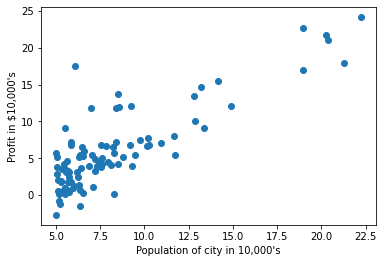

In [89]:
#plotting the data
plt.scatter(x,y)
plt.xlabel('Population of city in 10,000\'s')
plt.ylabel('Profit in $10,000\'s')
plt.show()

In [90]:
#Increasing the rank of both x and y for operations
x = x[:,np.newaxis]
y = y[:,np.newaxis]
theta = np.zeros([2,1])
#[theta1]
#[theta2]
iterations= 1500
alpha = 0.01
ones = np.ones((m,1))
x = np.hstack((ones,x)) #adding the ones column to x so that x*theta gives the h

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [91]:
#computing the cost
def computeCost(x,y,theta):
    temp = np.dot(x,theta) - y
    return np.sum(np.power(temp,2))/(2*m)
J = computeCost(x,y,theta)
print(J)

32.072733877455676


In [92]:
#Finding theta1 and theta2 using gradient descent
def gradientDescent(x,y,theta,alpha,iterations):
    for _ in range(iterations):
        temp = np.dot(x,theta)-y
        temp = np.dot(x.T,temp)
        theta = theta-(alpha/m)*temp
    return theta
theta = gradientDescent(x,y,theta,alpha,iterations)
print(theta)

[[-3.63029144]
 [ 1.16636235]]


In [93]:
#compute cost using optimal theta
J = computeCost(x,y,theta)
print(J)

4.483388256587726


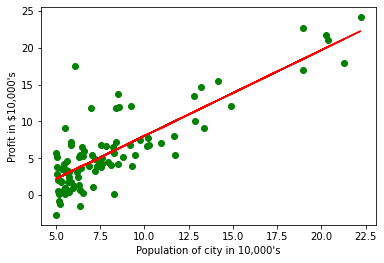

In [94]:
#plotting
plt.scatter(x[:,1],y,color='green')
plt.xlabel('Population of city in 10,000\'s')
plt.ylabel('Profit in $10,000\'s')
plt.plot(x[:,1],np.dot(x,theta),color='red')
plt.show()


**Linear Regression using sklearn**

In [95]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
#reading the dataset
df = pd.read_csv('dataset.csv',index_col=[0])
df.head()

,x,y
1,6.1101,17.5920
2,5.5277,9.1302
3,8.5186,13.6620
4,7.0032,11.8540
5,5.8598,6.8233


In [97]:
X = df.iloc[:,0]
y = df.iloc[:,1]

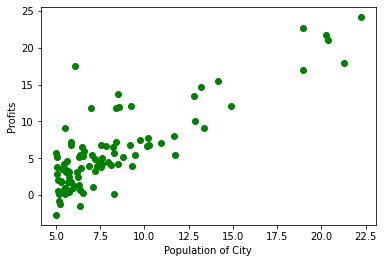

In [98]:
#plotting the samples
plt.figure()
plt.scatter(X,y,color='green')
plt.xlabel('Population of City')
plt.ylabel('Profits')
plt.show()

In [99]:
from sklearn.linear_model import LinearRegression
X = X[:,np.newaxis]
y = y[:,np.newaxis]
model = LinearRegression()
model.fit(X,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
model.intercept_

array([-3.89578088])

In [101]:
model.coef_

array([[1.19303364]])

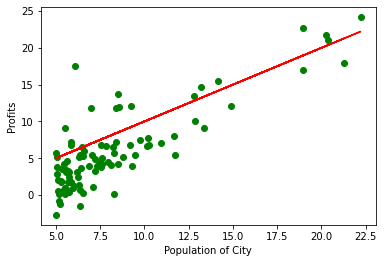

In [102]:
plt.figure()
plt.scatter(X,y,color='green')
plt.xlabel('Population of City')
plt.ylabel('Profits')
plt.plot(X,X,color='red')
plt.show()

In [103]:
y_pred = model.predict([[20.27]])
y_pred

array([[20.28701109]])

In [105]:
from sklearn.metrics import mean_squared_error
mean_squared_error([[21.767]], y_pred)

2.1903671754657954